In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer #<-----This library is use for Binning
from sklearn.compose import ColumnTransformer

In [8]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
df.shape

(714, 3)

In [14]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
X_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [18]:
X_test

,Age,Fare
149,42.0,13.0000
407,3.0,18.7500
53,29.0,26.0000
369,24.0,69.3000
818,43.0,6.4500
...,...,...
819,10.0,27.9000
164,1.0,39.6875
363,35.0,7.0500
56,21.0,10.5000


In [19]:
clf=DecisionTreeClassifier()

In [20]:
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

In [21]:
accuracy_score(Y_test,Y_pred)

0.6293706293706294

In [22]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

np.float64(0.6233372456964006)

In [39]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='kmeans')

In [40]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [41]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [42]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans'),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='kmeans')}

In [43]:
trf.named_transformers_['first']

,n_bins,15
,encode,'ordinal'
,strategy,'kmeans'
,quantile_method,'warn'
,dtype,None
,subsample,200000
,random_state,None


In [44]:
trf.named_transformers_['first'].n_bins_

array([15])

In [45]:
trf.named_transformers_['second'].n_bins_

array([15])

In [46]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  11.24103919,  19.86871564,  28.06543126,
               34.90886516,  45.73788324,  59.33660546,  72.27252098,
               84.10950431, 101.00790682, 123.56362348, 144.756475  ,
              185.67419167, 237.86718333, 385.651575  , 512.3292    ])],
      dtype=object)

In [47]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [48]:
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,2.0
73,26.0,4.0,14.4542,1.0
253,30.0,5.0,16.1000,1.0
719,33.0,6.0,7.7750,0.0
666,25.0,4.0,13.0000,1.0
...,...,...,...,...
92,46.0,8.0,61.1750,6.0
134,25.0,4.0,13.0000,1.0
337,41.0,7.0,134.5000,10.0
548,33.0,6.0,20.5250,2.0


In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
Y_pred2 = clf.predict(X_test_trf)

In [50]:
accuracy_score(Y_test,Y_pred2)

0.6433566433566433

In [51]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

np.float64(0.6331181533646322)

In [52]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

C:\Users\USER\anaconda3\envs\Booksenv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\USER\anaconda3\envs\Booksenv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.6289123630672926


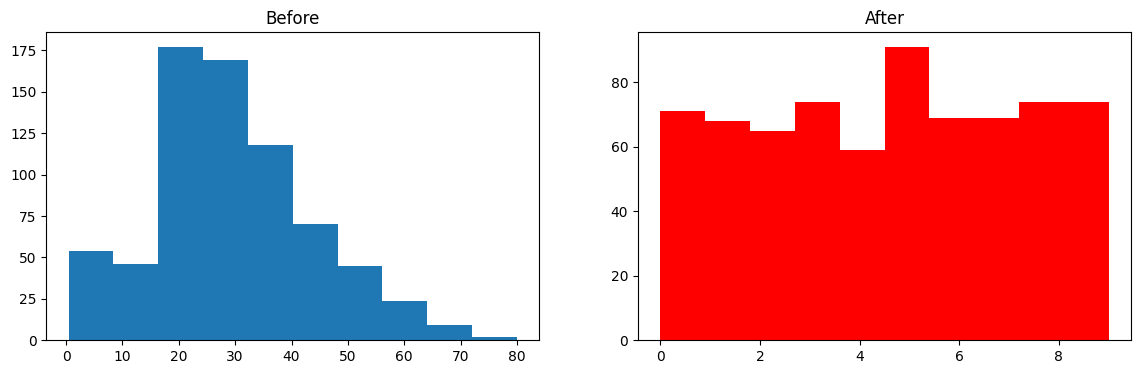

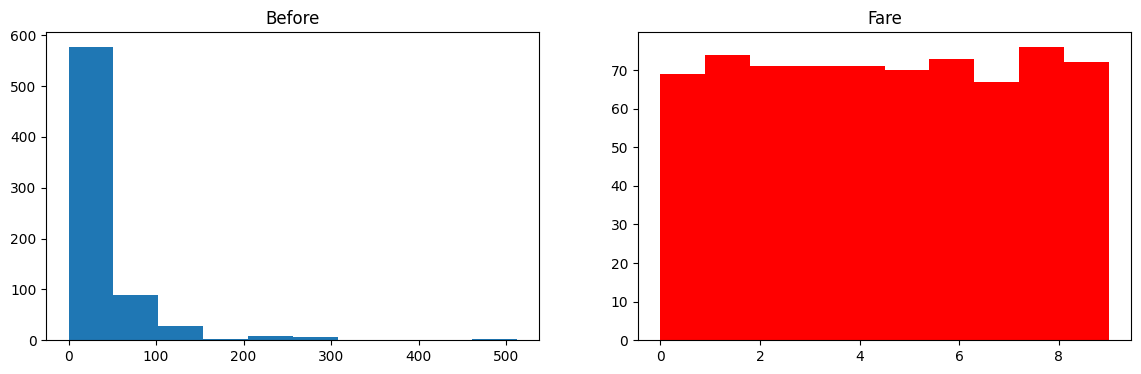

In [53]:
discretize(10,'quantile')

0.6317488262910798


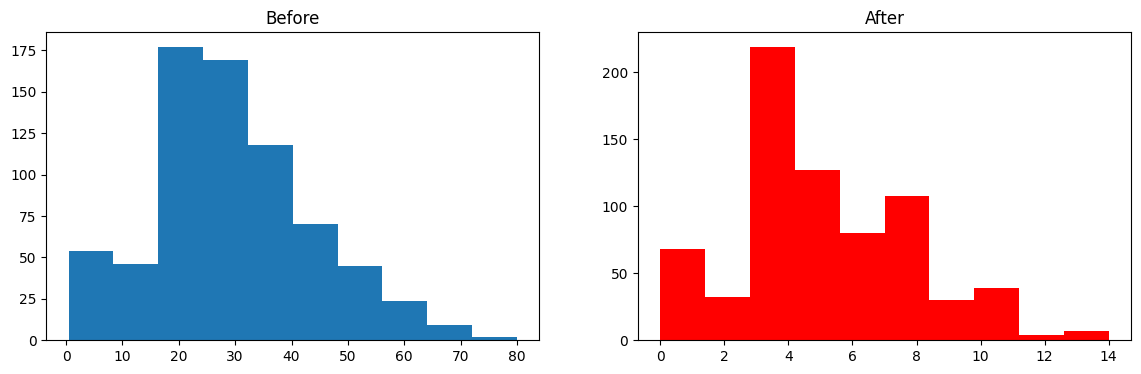

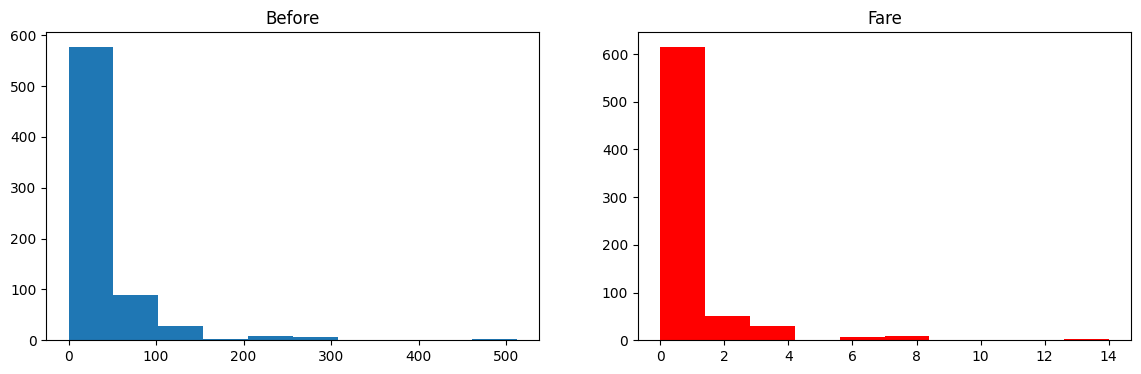

In [56]:
discretize(15,'uniform')